# Profile
Nama : Austin Christian Yonatan


## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Split data
from sklearn.model_selection import train_test_split 

#handling outlier dan scaling
from sklearn.preprocessing import MinMaxScaler 
from feature_engine.outliers import Winsorizer

#balancing data
from imblearn.over_sampling import SMOTENC

#model
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

#model improvement/ hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

#metric
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

#model saving
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

## Data Loading

In [2]:
df= pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

In [3]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [5]:
df_copy=df.copy()

## EDA

*Bagaimana distribusi kolom target atau Diabetes_012, apakah balance atau imbalance?*

<AxesSubplot:xlabel='Diabetes_012', ylabel='Count'>

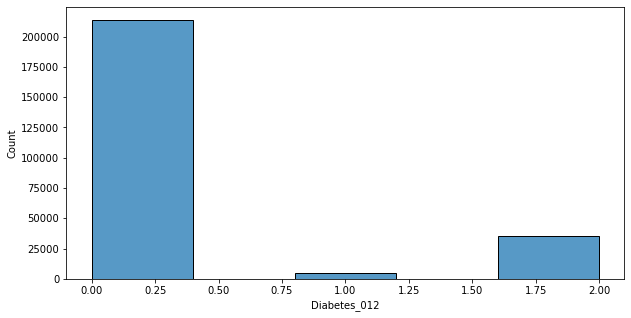

In [6]:
# Check distribusi data target

plt.figure(figsize=(10,5))
sns.histplot(df["Diabetes_012"], bins=5)

In [7]:
#persentase pasien
print("Persentase Pasien sehat: {:.2f}%".format((len(df[df["Diabetes_012"]==0]) / (len(df["Diabetes_012"]))*100)))
print("Persentase Pasien Pre-Diabetic: {:.2f}%".format((len(df[df["Diabetes_012"]==1]) / (len(df["Diabetes_012"]))*100)))
print("Persentase Pasien Diabetic: {:.2f}%".format((len(df[df["Diabetes_012"]==2]) / (len(df["Diabetes_012"]))*100)))

Persentase Pasien sehat: 84.24%
Persentase Pasien Pre-Diabetic: 1.83%
Persentase Pasien Diabetic: 13.93%


Dari pengecekan distribusi data kolom diabetes ternyata 84.24% merupakan pasien yang sehat, 1.83% yang prediabetic dan 13.93% yang sakit diabetes.
Jadi dataset ini merupakan dataset yang imbalance

*Bagaimana hubungan kolom target atau Diabetes_012 dengan HighBloodPressure?*

In [8]:
# membuat dataframe persentase death event untuk tiap high bloodpressure
BP_diabet = df.groupby('HighBP')['Diabetes_012'].value_counts(normalize=True)
BP_diabet = BP_diabet.mul(100).rename('percent').reset_index() 


<Figure size 864x288 with 0 Axes>

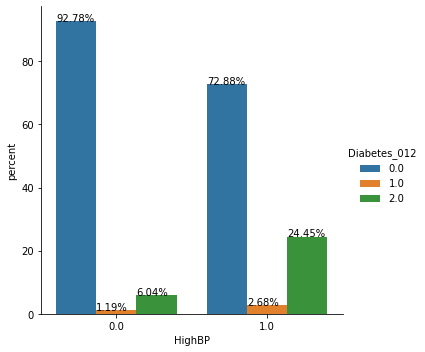

In [9]:
# membuat grafik
plt.figure(figsize=(12,4))
g=sns.catplot(data=BP_diabet, x='HighBP',y='percent', hue='Diabetes_012', kind='bar')
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)


Dari grafik diatas tampaknya orang yang memiliki tekanan darah tinggi lebih banyak yang terkena sakit diabetes

*Apakah Stroke atau tidaknya pasien mempengaruhi tingkat pasien sakit Diabetes?*

In [10]:
# membuat dataframe persentase diabetes untuk pasien stroke dan yang tidak stroke
Stroke_diabet = df.groupby('Stroke')['Diabetes_012'].value_counts(normalize=True)
Stroke_diabet = Stroke_diabet.mul(100).rename('percent').reset_index() 


<Figure size 864x288 with 0 Axes>

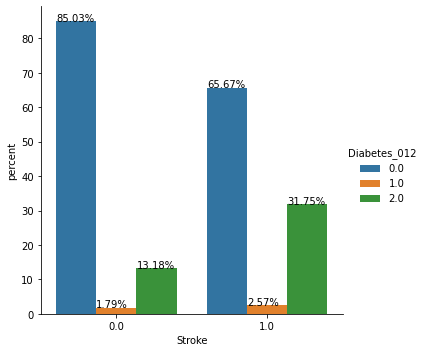

In [11]:
# membuat grafik
plt.figure(figsize=(12,4))
g=sns.catplot(data=Stroke_diabet, x='Stroke',y='percent', hue='Diabetes_012', kind='bar')
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)


Dari grafik diatas tampaknya orang yang sakit stroke lebih banyak yang terkena sakit diabetes

*Apakah pasien yang memiliki kesusahan berjalan lebih banyak yang sakit Diabetes?*

<Figure size 864x288 with 0 Axes>

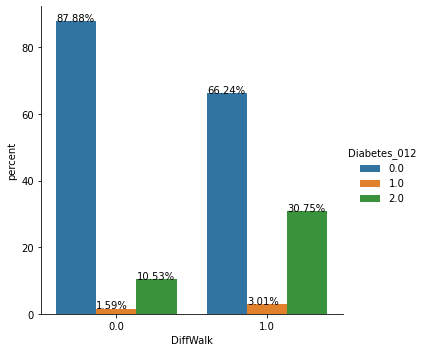

In [12]:
# membuat dataframe persentase diabetes untuk pasien yang memiliki kesusahan berjalan dan yang tidak
diffwalk_diabet = df.groupby('DiffWalk')['Diabetes_012'].value_counts(normalize=True)
diffwalk_diabet = diffwalk_diabet.mul(100).rename('percent').reset_index() 

# membuat grafik
plt.figure(figsize=(12,4))
g=sns.catplot(data=diffwalk_diabet, x='DiffWalk',y='percent', hue='Diabetes_012', kind='bar')
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)


Dari grafik diatas tampaknya orang yang mengalami kesusahan berjalan lebih banyak yang terkena sakit diabetes

*Apakah kolesterol tinggi mempengaruhi tingkat sakit Diabetes?*

<Figure size 864x288 with 0 Axes>

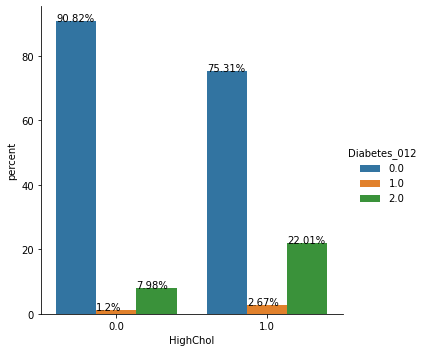

In [13]:
# membuat dataframe persentase diabetes untuk memiliki kolesterol tinggi dan tidak
chol_diabet = df.groupby('HighChol')['Diabetes_012'].value_counts(normalize=True)
chol_diabet = chol_diabet.mul(100).rename('percent').reset_index() 

# membuat grafik
plt.figure(figsize=(12,4))
g=sns.catplot(data=chol_diabet, x='HighChol',y='percent', hue='Diabetes_012', kind='bar')
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)


seperti yang diketahui bahwa kolesterol tinggi dapat menyebabkan kemungkinan diabetes meningkat.
Dari grafik diatas dapat dilihat orang yang memiliki kolesterol tinggi lebih banyak yang terkena sakit diabetes

*Apakah PhysActivity mempengaruhi tingkat sakit Diabetes?*

<Figure size 864x288 with 0 Axes>

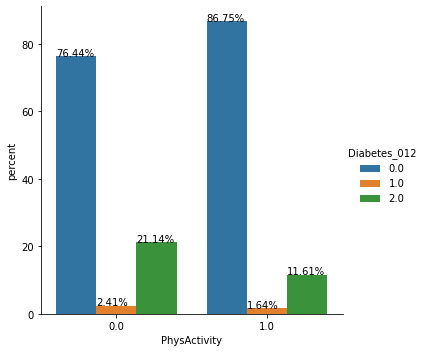

In [14]:
# membuat dataframe persentase diabetes terhadap physactivity
PhysActivity_diabet = df.groupby('PhysActivity')['Diabetes_012'].value_counts(normalize=True)
PhysActivity_diabet = PhysActivity_diabet.mul(100).rename('percent').reset_index() 

# membuat grafik
plt.figure(figsize=(12,4))
g=sns.catplot(data=PhysActivity_diabet, x='PhysActivity',y='percent', hue='Diabetes_012', kind='bar')
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)


seperti yang diketahui bahwa physical activity/pola hidup sehat dapat menurunkan kemungkinan terkena diabetes.
Dari grafik diatas dapat dilihat orang yang melakukan physical activity lebih sedikit yang terkena sakit diabetes.

*Apakah mengkonsumsi buah mempengaruhi tingkat sakit Diabetes?*

<Figure size 864x288 with 0 Axes>

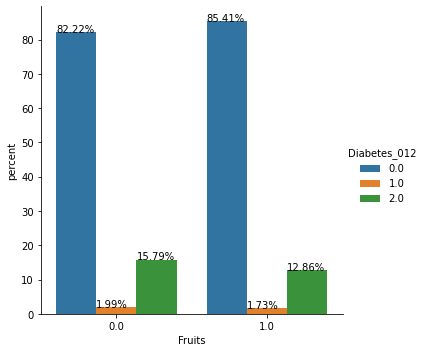

In [15]:
# membuat dataframe persentase diabetes untuk pasien yang sering mengkonsumsi buah dan tidak
fruit_diabet = df.groupby('Fruits')['Diabetes_012'].value_counts(normalize=True)
fruit_diabet = fruit_diabet.mul(100).rename('percent').reset_index() 

# membuat grafik
plt.figure(figsize=(12,4))
g=sns.catplot(data=fruit_diabet, x='Fruits',y='percent', hue='Diabetes_012', kind='bar')
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)


seperti yang diketahui bahwa pola hidup sehat dimana mengkonsumsi buah termasuk dalam salah satu-nya, dapat menurunkan kemungkinan terkena diabetes.
Dari grafik diatas dapat dilihat orang yang mengkonsumsi 1 buah atau lebih per hari, lebih sedikit yang terkena sakit diabetes walaupun perbedaannya hanya sedikit.

*Apakah mengkonsumsi sayur mempengaruhi tingkat sakit Diabetes?*

<Figure size 864x288 with 0 Axes>

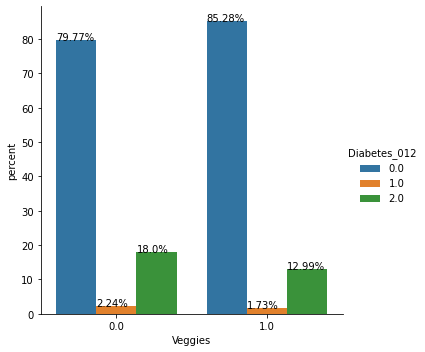

In [16]:
# membuat dataframe persentase diabetes untuk pasien yang sering mengkonsumsi sayur dan tidak
veg_diabet = df.groupby('Veggies')['Diabetes_012'].value_counts(normalize=True)
veg_diabet = veg_diabet.mul(100).rename('percent').reset_index() 

# membuat grafik
plt.figure(figsize=(12,4))
g=sns.catplot(data=veg_diabet, x='Veggies',y='percent', hue='Diabetes_012', kind='bar')
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)


diketahui bahwa pola hidup sehat dimana mengkonsumsi sayur termasuk dalam salah satu-nya, dapat menurunkan kemungkinan terkena diabetes. Tapi
dari grafik diatas kelihatannya orang yang mengkonsumsi 1 sayur atau lebih per hari, lebih banyak yang terkena sakit diabetes.

*Apakah banyak mengkonsumsi alkohol mempengaruhi tingkat sakit Diabetes?*

<Figure size 864x288 with 0 Axes>

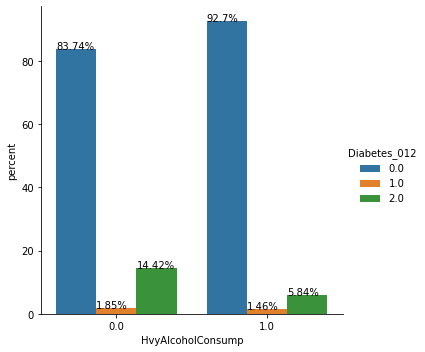

In [17]:
# membuat dataframe persentase diabetes untuk pasien yang sering mengkonsumsi alkohol dan tidak
alc_diabet = df.groupby('HvyAlcoholConsump')['Diabetes_012'].value_counts(normalize=True)
alc_diabet = alc_diabet.mul(100).rename('percent').reset_index() 

# membuat grafik
plt.figure(figsize=(12,4))
g=sns.catplot(data=alc_diabet, x='HvyAlcoholConsump',y='percent', hue='Diabetes_012', kind='bar')
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)


Dari grafik diatas kelihatannya orang yang banyak mengkonsumsi alkohol, lebih sedikit yang terkena sakit diabetes.

*Apakah umur mempengaruhi tingkat Diabetes?*

In [18]:
age_d=df.groupby(['Age','Diabetes_012']).apply(lambda x:x['Age'].count()).reset_index(name='counts')
px.line(age_d,x='Age',y='counts',color='Diabetes_012')

Seperti yang kita tahu dengan meningkatnya umur kemungkinan terkena diabetes juga meningkat.
Dari grafik diatas, kelihatannya umur memiliki pengaruh yang cukup signifikan pada penyakit diabetes, kelompok umur 9 dan 10 (umur 60-69) paling banyak terkena penyakit diabetes

*Apakah BMI mempengaruhi tingkat Diabetes?*

In [19]:
age_d=df.groupby(['BMI','Diabetes_012']).apply(lambda x:x['BMI'].count()).reset_index(name='counts')
px.line(age_d,x='BMI',y='counts',color='Diabetes_012')

Dari grafik diatas, kelihatannya bmi memiliki pengaruh yang cukup tinggi pada penyakit diabetes, bmi 27 keatas banyak terkena penyakit diabetes

*Apakah orang yang memiliki income tinggi lebih banyak menkonsumsi sayur?*

<Figure size 864x288 with 0 Axes>

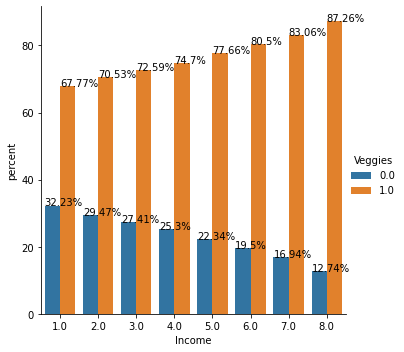

In [20]:
# membuat dataframe persentase orang yang memiliki income tinggi dan konsumsi sayur
income_veg = df.groupby('Income')['Veggies'].value_counts(normalize=True)
income_veg = income_veg.mul(100).rename('percent').reset_index() 

# membuat grafik
plt.figure(figsize=(12,4))
g=sns.catplot(data=income_veg, x='Income',y='percent', hue='Veggies', kind='bar')
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)


Dari grafik diatas kelihatannya semakin banyak income, semakin jarang orang tersebut mengkonsumsi sayur.

*Apakah orang yang memiliki income tinggi lebih banyak menkonsumsi buah?*

<Figure size 864x288 with 0 Axes>

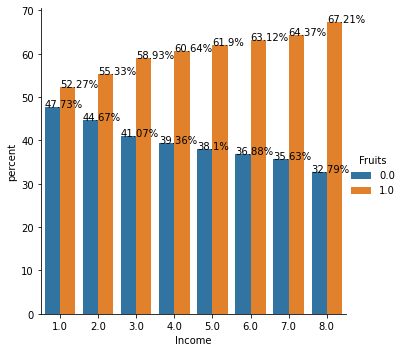

In [21]:
# membuat dataframe persentase orang yang memiliki income tinggi dan konsumsi buah
income_fruit = df.groupby('Income')['Fruits'].value_counts(normalize=True)
income_fruit = income_fruit.mul(100).rename('percent').reset_index() 

# membuat grafik
plt.figure(figsize=(12,4))
g=sns.catplot(data=income_fruit, x='Income',y='percent', hue='Fruits', kind='bar')
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)


Dari grafik diatas kelihatannya semakin banyak income, semakin jarang orang tersebut mengkonsumsi buah.

*Apakah orang yang memiliki income tinggi lebih banyak yang sering menkonsumsi alkohol?*

<Figure size 864x288 with 0 Axes>

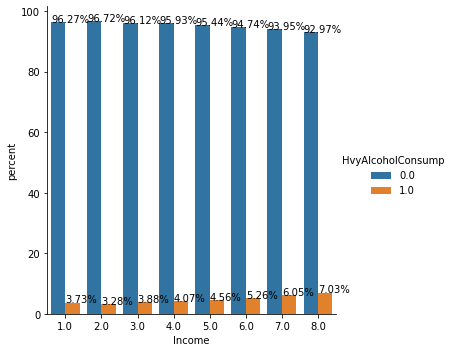

In [22]:
# membuat dataframe persentase orang yang memiliki income tinggi dan konsumsi alkohol
income_alc = df.groupby('Income')['HvyAlcoholConsump'].value_counts(normalize=True)
income_alc = income_alc.mul(100).rename('percent').reset_index() 

# membuat grafik
plt.figure(figsize=(12,4))
g=sns.catplot(data=income_alc, x='Income',y='percent', hue='HvyAlcoholConsump', kind='bar')
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)


Dari grafik diatas kelihatannya semakin banyak income, semakin sering orang tersebut mengkonsumsi alkohol.

Karena menurut pemahaman saya orang yang memiliki edukasi tinggi atau tidak, tidak akan mempengahi kemungkinan orang tersebut terkena diabetes maka kolom education pada dataset ini akan saya drop.

In [23]:
#drop kolom education
df.drop(columns=['Education'],inplace=True)

## Preprocessing

**Split dataset**  
Akan dilakukan pemisahan dataset untuk data inference, data train, data test, dan pemisahan antara data kategorik dan numerik

In [24]:
# sampling data inference
data_inf= df.sample(20, random_state=1)
data_inf

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Income
235899,0.0,1.0,0.0,1.0,23.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,13.0,6.0
74852,2.0,0.0,0.0,1.0,22.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,0.0,2.0,0.0,5.0,0.0,1.0,9.0,8.0
8205,0.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,6.0
127632,2.0,1.0,0.0,1.0,39.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,4.0,0.0,0.0,0.0,1.0,11.0,5.0
32021,0.0,0.0,0.0,1.0,22.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,10.0,8.0
51123,0.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,12.0,8.0
37788,2.0,1.0,1.0,1.0,38.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,2.0,1.0,0.0,1.0,0.0,11.0,5.0
174047,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,8.0
80115,0.0,0.0,0.0,1.0,22.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,2.0,5.0,2.0,0.0,0.0,6.0,7.0
122026,0.0,1.0,0.0,1.0,23.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,11.0,5.0


In [25]:
# Drop data inference pada data untuk train dan test
data_train_test= df.drop(data_inf.index)
data_train_test

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,1.0


In [26]:
#reset index
data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

In [27]:
# menentukan DEATH_EVENT sebagai target dan mendrop kolom DEATH_EVENT pada data prediktor
X=data_train_test.drop(["Diabetes_012"], axis=1)
y=data_train_test["Diabetes_012"]

In [28]:
# Split data train dan test
X_train_imbalance, X_test, y_train_imbalance, y_test= train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [29]:
# Split data ketegorikal dan numerik
num_dat=X_train_imbalance[["BMI"]]
cat_dat=X_train_imbalance.drop(columns=num_dat)


In [30]:
num_col=num_dat.columns
cat_col=cat_dat.columns

In [31]:
X_train_imbalance_num= X_train_imbalance[num_col]
X_train_imbalance_cat= X_train_imbalance[cat_col]

X_test_num= X_test[num_col]
X_test_cat= X_test[cat_col]

c:\Users\Bloodink\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



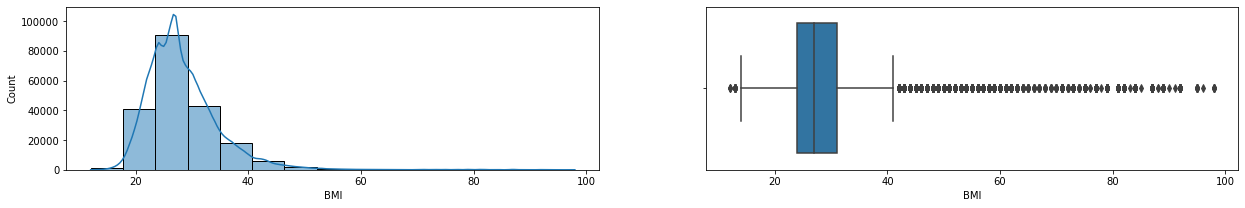

In [32]:
# Cek distribusi data
fig, axs = plt.subplots(1,2,figsize=(21,3));
sns.histplot(X_train_imbalance_num["BMI"],bins=15, kde=True, ax=axs[0]);
sns.boxplot(X_train_imbalance_num["BMI"], ax = axs[1]);

In [33]:
# Cek distribusi data
print("BMI skewness value :", X_train_imbalance_num["BMI"].skew())

BMI skewness value : 2.136564797667519


kolom numerik pada dataset terdistribusi secara skewed

---
### Handling Missing Value

Dilakukan pengecekan missing value terlebih dahulu

In [34]:
X_train_imbalance.isna().sum()

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Income                  0
dtype: int64

In [35]:
X_test.isna().sum()

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Income                  0
dtype: int64

In [36]:
y_train_imbalance.isna().sum()

0

In [37]:
y_test.isna().sum()

0

dari pengecekan missing value ternyata tidak ada missing value pada dataset

---
### Handling Outliers

melakukan pengecekan ada berapa outliers pada kolom yang terdistribusi normal

In [38]:
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [39]:
upper_boundary, lower_boundary = find_skewed_boundaries(X_train_imbalance, "BMI", 1.5)
print("right end outliers : {}".format(len(X_train_imbalance[X_train_imbalance["BMI"] > upper_boundary]) / len(X_train_imbalance) * 100))

print("left end outliers : {}".format(len(X_train_imbalance[X_train_imbalance["BMI"] < lower_boundary]) / len(X_train_imbalance) * 100))

right end outliers : 3.852597965780967
left end outliers : 0.009855712370890168


Ada outlier pada kolom BMI sebesar 3.8%. Jika dilakukan trimming outlier ditakutkan data outlier yang ditrimming merupakan data dari Diabetes_012 yang sedikit, maka saya lakukan capping outlier dengan Winsorizer.

In [40]:
windsoriser = Winsorizer(capping_method='iqr',
                          tail='both', 
                          fold=1.5,
                          variables=['BMI'])

windsoriser.fit(X_train_imbalance)

X_train_imbalance_no_outlier = windsoriser.transform(X_train_imbalance)

---
### Scaling
disini saya melakukan minmaxscaling karena data numerik terdistribusi secara skewed

In [41]:
X_train_imbalance_no_outlier_num=X_train_imbalance_no_outlier[num_col]
X_train_imbalance_no_outlier_cat=X_train_imbalance_no_outlier[cat_col]

In [42]:
# mendefinisikan scaler
scaler= MinMaxScaler()
# fit data 
scaler.fit(X_train_imbalance_no_outlier_num)
# transform data
X_train_scaled= scaler.transform(X_train_imbalance_no_outlier_num)
X_test_scaled=scaler.transform(X_test_num)

---
### Encoding

tidak dilakukan encoding karena data kategorikal sudah dalam bentuk integer

In [43]:
#merge data kategorikal dan numerik yang telah di-scale
X_train_imbalance_final= np.concatenate([X_train_scaled,X_train_imbalance_cat], axis=1)
X_test_final= np.concatenate([X_test_scaled,X_test_cat], axis=1)

In [44]:
X_train_imbalance_final_df= pd.DataFrame(X_train_imbalance_final, columns=['BMI', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Income'])
X_train_imbalance_final_df

,BMI,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Income
0,0.589286,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,4.0
1,0.410714,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,2.0,0.0,0.0,7.0,8.0
2,0.446429,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,7.0,4.0
3,0.482143,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,2.0,0.0,0.0,11.0,4.0
4,0.625000,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,13.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202923,0.339286,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,3.0,8.0
202924,0.375000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,5.0,7.0
202925,0.482143,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,7.0,7.0
202926,0.375000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,7.0,0.0,0.0,1.0,6.0,8.0


---
### Handling Imbalance data

In [45]:
# we need to capture the index of the discrete variables
# membuat list kategorikal
cat_col_var= [var for var in cat_dat.columns]
# capture the index in the dataframe columns
cat_col_index = [cat_col_var.index(x) for x in cat_col_var]


In [46]:
#SMOTENC
smotenc = SMOTENC(sampling_strategy='not majority', random_state = 48, categorical_features=cat_col_index)
X_train_balanced, y_train_balanced = smotenc.fit_resample(X_train_imbalance_final_df, y_train_imbalance)
y_train_balanced.value_counts()

0.0    170949
2.0    170949
1.0    170949
Name: Diabetes_012, dtype: int64

---
## Model Definition

In [47]:
logreg= LogisticRegression(random_state=10)
knn = KNeighborsClassifier()
rf= RandomForestClassifier(random_state=10)
ada= AdaBoostClassifier(random_state= 10)

## Model Training


**Define Hyperparameter**

In [48]:
#hyperparameter logistic regression
C = [0.01, 0.1, 1, 2, 10, 100]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

paramgrid_logreg = {
    'C':C,
    'solver': solver,
}

paramgrid_logreg

{'C': [0.01, 0.1, 1, 2, 10, 100],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [49]:
#hyperparameter knn
n_neighbors = [1, 3, 5, 7, 9]
weights = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

paramgrid_knn = {
    'n_neighbors':n_neighbors,
    'weights': weights,
    'algorithm': algorithm,
}

paramgrid_knn

{'n_neighbors': [1, 3, 5, 7, 9],
 'weights': ['uniform', 'distance'],
 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

In [50]:
#define hyperparameter untuk random forest
max_features = ['auto', 'sqrt', 'log2']
criterion= ['gini', 'entropy', 'log_loss']
max_depth = [10, 25, 50]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 5]

paramgrid_rf={"max_features":max_features,
            "max_depth": max_depth,
            "min_samples_split": min_samples_split,
            "min_samples_leaf": min_samples_leaf}
paramgrid_rf

{'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [10, 25, 50],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 5]}

In [51]:
#define hyperparameter untuk adaboost
base_estimator = [RandomForestClassifier(), None, LogisticRegression(), KNeighborsClassifier()]
n_estimators = [25, 50, 100]
algorithm = ["SAMME", "SAMME.R"]


paramgrid_ada={"base_estimator":base_estimator,
            "n_estimators": n_estimators,
            "algorithm": algorithm,}
paramgrid_ada

{'base_estimator': [RandomForestClassifier(),
  None,
  LogisticRegression(),
  KNeighborsClassifier()],
 'n_estimators': [25, 50, 100],
 'algorithm': ['SAMME', 'SAMME.R']}

**Train dengan data awal (yang belum dibalancing)**

In [52]:
# train model logistic regressi pada data yang imbalance dengan menggunakan metode randomsearch untuk menentukan hyperparameter tuning 
logreg_gridcv1 = RandomizedSearchCV(estimator=LogisticRegression(random_state=10),
                         param_distributions=paramgrid_logreg,
                         cv=3,
                         n_jobs=-1,
                         scoring='recall')

logreg_gridcv1.fit(X_train_imbalance_final, y_train_imbalance)

c:\Users\Bloodink\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=LogisticRegression(random_state=10),
                   n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 2, 10, 100],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='recall')

In [53]:
# train model knn pada data yang imbalance dengan menggunakan metode randomsearch untuk menentukan hyperparameter tuning 
knn_gridcv1 = RandomizedSearchCV(estimator=KNeighborsClassifier(),
                         param_distributions=paramgrid_knn,
                         cv=3,
                         n_jobs=-1,
                         scoring='recall')

knn_gridcv1.fit(X_train_imbalance_final, y_train_imbalance)

c:\Users\Bloodink\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': [1, 3, 5, 7, 9],
                                        'weights': ['uniform', 'distance']},
                   scoring='recall')

In [54]:
# train model random forest pada data yang imbalance dengan menggunakan metode randomsearch untuk menentukan hyperparameter tuning 
rf_gridcv1 = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=10),
                         param_distributions=paramgrid_rf,
                         cv=3,
                         n_jobs=-1,
                         scoring='recall')

rf_gridcv1.fit(X_train_imbalance_final, y_train_imbalance)

c:\Users\Bloodink\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
c:\Users\Bloodink\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=10),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 25, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [2, 5, 10]},
                   scoring='recall')

In [55]:
# train model adaboost pada data yang imbalance dengan menggunakan metode randomsearch untuk menentukan hyperparameter tuning 
ada_gridcv1 = RandomizedSearchCV(estimator=AdaBoostClassifier(random_state=10),
                         param_distributions=paramgrid_ada,
                         cv=3,
                         n_jobs=-1,
                         scoring='recall')

ada_gridcv1.fit(X_train_imbalance_final, y_train_imbalance)

c:\Users\Bloodink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
18 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Bloodink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Bloodink\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 506, in fit
    return super().fit(X, y, sample_weight)
  File "c:\Users\Bloodink\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 147, in fit
    self._validate_estimator()
  File "c:

RandomizedSearchCV(cv=3, estimator=AdaBoostClassifier(random_state=10),
                   n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'base_estimator': [RandomForestClassifier(),
                                                           None,
                                                           LogisticRegression(),
                                                           KNeighborsClassifier()],
                                        'n_estimators': [25, 50, 100]},
                   scoring='recall')

**Train dengan data yang sudah dibalancing**

In [56]:
# train model logistic regressi pada data yang balance dengan menggunakan metode randomsearch untuk menentukan hyperparameter tuning 
logreg_gridcv2 = RandomizedSearchCV(estimator=LogisticRegression(random_state=10),
                         param_distributions=paramgrid_logreg,
                         cv=3,
                         n_jobs=-1,
                         scoring='recall')

logreg_gridcv2.fit(X_train_balanced, y_train_balanced)

c:\Users\Bloodink\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=LogisticRegression(random_state=10),
                   n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 2, 10, 100],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='recall')

In [57]:
# train model knn pada data yang balance dengan menggunakan metode randomsearch untuk menentukan hyperparameter tuning 
knn_gridcv2 = RandomizedSearchCV(estimator=KNeighborsClassifier(),
                         param_distributions=paramgrid_knn,
                         cv=3,
                         n_jobs=-1,
                         scoring='recall')

knn_gridcv2.fit(X_train_balanced, y_train_balanced)

c:\Users\Bloodink\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': [1, 3, 5, 7, 9],
                                        'weights': ['uniform', 'distance']},
                   scoring='recall')

In [58]:
# train model random forest pada data yang balance dengan menggunakan metode randomsearch untuk menentukan hyperparameter tuning 
rf_gridcv2 = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=10),
                         param_distributions=paramgrid_rf,
                         cv=3,
                         n_jobs=-1,
                         scoring='recall')

rf_gridcv2.fit(X_train_balanced, y_train_balanced)

c:\Users\Bloodink\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=10),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 25, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [2, 5, 10]},
                   scoring='recall')

In [59]:
# train model adaboost pada data yang balance dengan menggunakan metode randomsearch untuk menentukan hyperparameter tuning 
ada_gridcv2 = RandomizedSearchCV(estimator=AdaBoostClassifier(random_state=10),
                         param_distributions=paramgrid_ada,
                         cv=3,
                         n_jobs=-1,
                         scoring='recall')

ada_gridcv2.fit(X_train_balanced, y_train_balanced)

c:\Users\Bloodink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
12 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Bloodink\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Bloodink\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 506, in fit
    return super().fit(X, y, sample_weight)
  File "c:\Users\Bloodink\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 160, in fit
    sample_weight, estimator_weight, esti

RandomizedSearchCV(cv=3, estimator=AdaBoostClassifier(random_state=10),
                   n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'base_estimator': [RandomForestClassifier(),
                                                           None,
                                                           LogisticRegression(),
                                                           KNeighborsClassifier()],
                                        'n_estimators': [25, 50, 100]},
                   scoring='recall')

cek hyperparameter terbaik

In [60]:
print('Hyperparameter terbaik tiap model untuk data yang belum dibalancing')
print('hyperparameter terbaik untuk logistic regression     : ', logreg_gridcv1.best_params_)
print('hyperparameter terbaik untuk KNN     : ', knn_gridcv1.best_params_)
print('hyperparameter terbaik untuk Random Forest     : ', rf_gridcv1.best_params_)
print('hyperparameter terbaik untuk Adaboost     : ', ada_gridcv1.best_params_)

Hyperparameter terbaik tiap model untuk data yang belum dibalancing
hyperparameter terbaik untuk logistic regression     :  {'solver': 'sag', 'C': 2}
hyperparameter terbaik untuk KNN     :  {'weights': 'uniform', 'n_neighbors': 9, 'algorithm': 'kd_tree'}
hyperparameter terbaik untuk Random Forest     :  {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 25}
hyperparameter terbaik untuk Adaboost     :  {'n_estimators': 100, 'base_estimator': None, 'algorithm': 'SAMME.R'}


In [61]:
print('Hyperparameter terbaik tiap model untuk data yang sudah dibalancing')
print('hyperparameter terbaik untuk logistic regression     : ', logreg_gridcv2.best_params_)
print('hyperparameter terbaik untuk KNN     : ', knn_gridcv2.best_params_)
print('hyperparameter terbaik untuk Random Forest     : ', rf_gridcv2.best_params_)
print('hyperparameter terbaik untuk Adaboost     : ', ada_gridcv2.best_params_)

Hyperparameter terbaik tiap model untuk data yang sudah dibalancing
hyperparameter terbaik untuk logistic regression     :  {'solver': 'liblinear', 'C': 1}
hyperparameter terbaik untuk KNN     :  {'weights': 'uniform', 'n_neighbors': 9, 'algorithm': 'auto'}
hyperparameter terbaik untuk Random Forest     :  {'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 10}
hyperparameter terbaik untuk Adaboost     :  {'n_estimators': 25, 'base_estimator': LogisticRegression(), 'algorithm': 'SAMME'}


In [62]:
#menyimpan model dengan hyperparameter terbaik dari randomsearch (data imbalance)
logreg_randomcv1_best = logreg_gridcv1.best_estimator_
knn_randomcv1_best = knn_gridcv1.best_estimator_
rf_randomcv1_best = rf_gridcv1.best_estimator_
ada_randomcv1_best = ada_gridcv1.best_estimator_

In [64]:
#menyimpan model dengan hyperparameter terbaik dari randomsearch (data balance)
logreg_randomcv2_best = logreg_gridcv2.best_estimator_
knn_randomcv2_best = knn_gridcv2.best_estimator_
rf_randomcv2_best = rf_gridcv2.best_estimator_
ada_randomcv2_best = ada_gridcv2.best_estimator_

---
## Model Evaluation

In [65]:
# predict data dengan model yang belajar dari data yang tidak balance
y_pred_logreg_imbalance = logreg_randomcv1_best.predict(X_test_final)
y_pred_knn_imbalance = knn_randomcv1_best.predict(X_test_final)
y_pred_rf_imbalance = rf_randomcv1_best.predict(X_test_final)
y_pred_ada_imbalance = ada_randomcv1_best.predict(X_test_final)

In [66]:
print("Model yang belajar dari data yang tidak balance:\n")
print("logistic regression:\n",classification_report(y_test, y_pred_logreg_imbalance))
print("knn :\n",classification_report(y_test, y_pred_knn_imbalance))
print("random forest:\n",classification_report(y_test, y_pred_rf_imbalance))
print("adaboost:\n",classification_report(y_test, y_pred_ada_imbalance))

Model yang belajar dari data yang tidak balance:

logistic regression:
               precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     42737
         1.0       0.00      0.00      0.00       926
         2.0       0.52      0.21      0.30      7069

    accuracy                           0.85     50732
   macro avg       0.46      0.39      0.40     50732
weighted avg       0.80      0.85      0.81     50732



c:\Users\Bloodink\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Bloodink\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Bloodink\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Bloodink\anaconda3\lib\site-packages\

knn :
               precision    recall  f1-score   support

         0.0       0.86      0.97      0.91     42737
         1.0       0.00      0.00      0.00       926
         2.0       0.44      0.14      0.22      7069

    accuracy                           0.84     50732
   macro avg       0.43      0.37      0.38     50732
weighted avg       0.78      0.84      0.80     50732

random forest:
               precision    recall  f1-score   support

         0.0       0.86      0.97      0.91     42737
         1.0       0.03      0.00      0.00       926
         2.0       0.49      0.20      0.28      7069

    accuracy                           0.84     50732
   macro avg       0.46      0.39      0.40     50732
weighted avg       0.80      0.84      0.81     50732

adaboost:
               precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     42737
         1.0       0.00      0.00      0.00       926
         2.0       0.54      0.20      0.

c:\Users\Bloodink\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Bloodink\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
# predict data dengan model yang belajar dari data yang sudah di-balancing
y_pred_logreg_balance = logreg_randomcv2_best.predict(X_test_final)
y_pred_knn_balance = knn_randomcv2_best.predict(X_test_final)
y_pred_rf_balance = rf_randomcv2_best.predict(X_test_final)
y_pred_ada_balance = ada_randomcv2_best.predict(X_test_final)

c:\Users\Bloodink\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Bloodink\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\Bloodink\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\Bloodink\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


In [68]:
print("Model yang belajar dari data yang sudah di-balancing:\n")
print("logistic regression:\n",classification_report(y_test, y_pred_logreg_balance))
print("knn :\n",classification_report(y_test, y_pred_knn_balance))
print("random forest:\n",classification_report(y_test, y_pred_rf_balance))
print("adaboost:\n",classification_report(y_test, y_pred_ada_balance))

Model yang belajar dari data yang sudah di-balancing:

logistic regression:
               precision    recall  f1-score   support

         0.0       0.94      0.68      0.79     42737
         1.0       0.03      0.30      0.05       926
         2.0       0.37      0.54      0.44      7069

    accuracy                           0.66     50732
   macro avg       0.45      0.51      0.43     50732
weighted avg       0.85      0.66      0.73     50732

knn :
               precision    recall  f1-score   support

         0.0       0.91      0.71      0.80     42737
         1.0       0.03      0.16      0.05       926
         2.0       0.28      0.47      0.35      7069

    accuracy                           0.67     50732
   macro avg       0.41      0.45      0.40     50732
weighted avg       0.81      0.67      0.72     50732

random forest:
               precision    recall  f1-score   support

         0.0       0.93      0.71      0.81     42737
         1.0       0.03      


- Dari model yang telah dibuat, model yang ditrain dengan data yang tidak balance tidak baik untuk digunakan karena tidak dapat memprediksi orang yang prediabetes, dan nilai recall untuk prediksi orang yang diabetes adalah positif sangat kecil
- Model yang ditrain dengan data yang sudah dibalancing lebih baik daripada model yang ditrain dengan data yang tidak balance, dapat dilihat dari classification reportnya bahwa model ini sudah dapat memprediksi orang yang prediabetes walaupun masih sangat kurang baik dalam prediksinya, dilihat dari nilai recallnya yang kecil. untuk prediksi orang yang diabetes juga lebih baik 
- Jika dilihat dari classification report, dari pengerjaan ini model terbaik yang didapatkan adalah model adaboost yang ditrain dengan data yang telah di-balancing

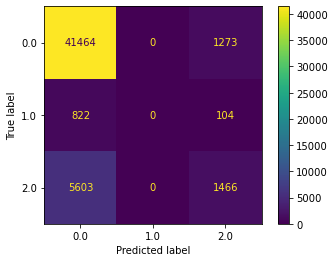

In [94]:
#confusion matrix dari salah satu model yang ditrain dengan data yang tidak balance
cm1 = confusion_matrix(y_test,y_pred_logreg_imbalance, labels=logreg_gridcv2.classes_)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=logreg_gridcv2.classes_)
disp1.plot()

c:\Users\Bloodink\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Bloodink\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Bloodink\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Bloodink\anaconda3\lib\site-packages\sklearn\b

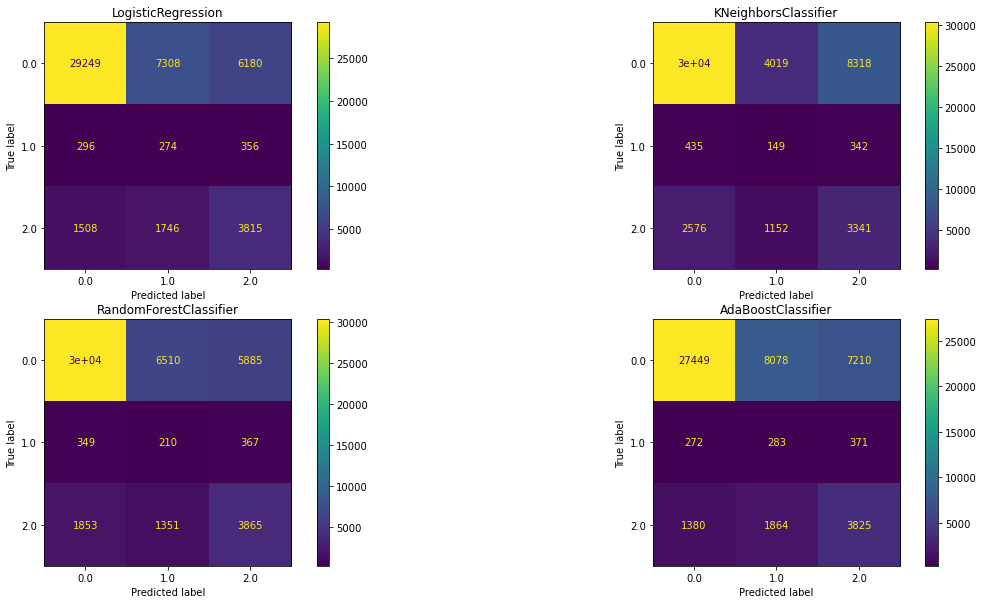

In [105]:
classifiers = [logreg_randomcv2_best,
               knn_randomcv2_best,
               rf_randomcv2_best,
               ada_randomcv2_best]
fig, axes = plt.subplots(2,2,figsize=(25,10))

for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, 
                          X_test_final, 
                          y_test, 
                          ax=ax, 
                         display_labels=knn_gridcv2.classes_)
    ax.title.set_text(type(cls).__name__) 
plt.show()

**Perbandingan dengan data train apakah goodfit atau overfit**

In [188]:
y_pred_train_logreg=logreg_randomcv2_best.predict(X_train_balanced)
y_pred_train_knn = knn_randomcv2_best.predict(X_train_balanced)
y_pred_train_rf = rf_randomcv2_best.predict(X_train_balanced)
y_pred_train_ada = ada_randomcv2_best.predict(X_train_balanced)

In [189]:
print("predict data train dengan model yang belajar dari data yang sudah di-balancing:\n")
print("logistic regression:\n",classification_report(y_train_balanced, y_pred_train_logreg))
print("knn :\n",classification_report(y_train_balanced, y_pred_train_knn))
print("random forest:\n",classification_report(y_train_balanced, y_pred_train_rf))
print("adaboost:\n",classification_report(y_train_balanced, y_pred_train_ada))

predict data train dengan model yang belajar dari data yang sudah di-balancing:

logistic regression:
               precision    recall  f1-score   support

         0.0       0.63      0.69      0.66    170949
         1.0       0.46      0.39      0.42    170949
         2.0       0.53      0.56      0.55    170949

    accuracy                           0.55    512847
   macro avg       0.54      0.55      0.54    512847
weighted avg       0.54      0.55      0.54    512847

knn :
               precision    recall  f1-score   support

         0.0       0.86      0.75      0.80    170949
         1.0       0.87      0.94      0.90    170949
         2.0       0.82      0.86      0.84    170949

    accuracy                           0.85    512847
   macro avg       0.85      0.85      0.85    512847
weighted avg       0.85      0.85      0.85    512847

random forest:
               precision    recall  f1-score   support

         0.0       0.74      0.71      0.72    170949
   

- Dari perbandingan prediksi y train dan y test model yang telah dibuat, terdapat overfit hal ini mungkin disebabkan oleh banyaknya data yang digenerate menggunakan smote

---
## Model Saving

Dari model yang terbaik saya simpan kedalam pipeline

In [48]:
pipe_pre=ColumnTransformer([
        ("num", MinMaxScaler(), list(num_col))
    ])
full_pipeline_with_predictor_rf = Pipeline([
        ("preparation", pipe_pre),
        ("model", RandomForestClassifier(min_samples_split= 5, min_samples_leaf= 5, max_features= 'sqrt', max_depth= 10))
    ])

full_pipeline_with_predictor_ada = Pipeline([
        ("preparation", pipe_pre),
        ("model", AdaBoostClassifier(n_estimators= 25, base_estimator= LogisticRegression(), algorithm= 'SAMME'))
    ])

In [49]:
#mencoba apakah pipeline preprocessing dapat berjalan dengan baik
pipe_pre.fit_transform(X_train_imbalance, y_train_imbalance)

array([[0.20930233],
       [0.15116279],
       [0.1627907 ],
       ...,
       [0.1744186 ],
       [0.13953488],
       [0.15116279]])

In [50]:
#mencoba apakah pipeline model random forest dapat berjalan dengan baik
full_pipeline_with_predictor_rf.fit(X_train_balanced,y_train_balanced)
full_pipeline_with_predictor_rf.predict(X_test)

array([2., 2., 2., ..., 2., 2., 2.])

In [51]:
#mencoba apakah pipeline model adaboost dapat berjalan dengan baik
full_pipeline_with_predictor_ada.fit(X_train_balanced,y_train_balanced)
full_pipeline_with_predictor_ada.predict(X_test)

array([2., 2., 2., ..., 2., 2., 2.])

---
## Model Inference

In [52]:
data_inf

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Income
0,0.0,1.0,0.0,1.0,23.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,13.0,6.0
1,2.0,0.0,0.0,1.0,22.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,0.0,2.0,0.0,5.0,0.0,1.0,9.0,8.0
2,0.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,6.0
3,2.0,1.0,0.0,1.0,39.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,4.0,0.0,0.0,0.0,1.0,11.0,5.0
4,0.0,0.0,0.0,1.0,22.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,10.0,8.0
5,0.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,12.0,8.0
6,2.0,1.0,1.0,1.0,38.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,2.0,1.0,0.0,1.0,0.0,11.0,5.0
7,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,8.0
8,0.0,0.0,0.0,1.0,22.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,2.0,5.0,2.0,0.0,0.0,6.0,7.0
9,0.0,1.0,0.0,1.0,23.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,11.0,5.0


In [53]:
full_pipeline_with_predictor_rf.predict(data_inf)

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2.])

In [54]:
full_pipeline_with_predictor_ada.predict(data_inf)

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2.])

In [56]:
data_inf.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Income'],
      dtype='object')

---
## Kesimpulan

- Dataset diabetes memiliki data yang imbalance dengan 84.24% dari data merupakan pasien yang sehat, 1.83% dari data yang prediabetic dan 13.93% dari data yang sakit diabetes.
- Dari grafik pada eda kelihatannya orang yang terkena diabetes, jarang mengkonsumsi buah dan berolahraga
- Dari model yang telah dibuat, model yang ditrain dengan data yang tidak balance tidak baik untuk digunakan karena tidak dapat memprediksi orang yang prediabetes, dan nilai recall untuk prediksi orang yang diabetes adalah positif sangat kecil
- Model yang ditrain dengan data yang sudah dibalancing lebih baik daripada model yang ditrain dengan data yang tidak balance, dapat dilihat dari classification reportnya bahwa model ini sudah dapat memprediksi orang yang prediabetes walaupun masih sangat kurang baik dalam prediksinya, dilihat dari nilai recallnya yang kecil. untuk prediksi orang yang diabetes juga lebih baik 
- Jika dilihat dari classification report, dari pengerjaan ini model terbaik yang didapatkan adalah model adaboost yang ditrain dengan data yang telah di-balancing
- Dari perbandingan prediksi y train dan y test model yang telah dibuat, terdapat overfit hal ini mungkin disebabkan oleh banyaknya data yang digenerate menggunakan smote

---
## Deployment

In [55]:
import pickle

with open('full_pipeline_with_predictor_rf.pkl', 'wb') as pipe_file_rf:
    pickle.dump(full_pipeline_with_predictor_rf, pipe_file_rf)

with open('full_pipeline_with_predictor_ada.pkl', 'wb') as pipe_file_ada:
    pickle.dump(full_pipeline_with_predictor_ada, pipe_file_ada)